## Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/processed/financial_loan_cleaned.csv')
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,13-09-2021,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,14-12-2021,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,12-12-2021,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,12-12-2021,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,14-12-2021,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Customer Demographics

## Step 2: Explore the State Distribution
Analyze the distribution of borrowers by state to identify where most of the loan applications are coming from.

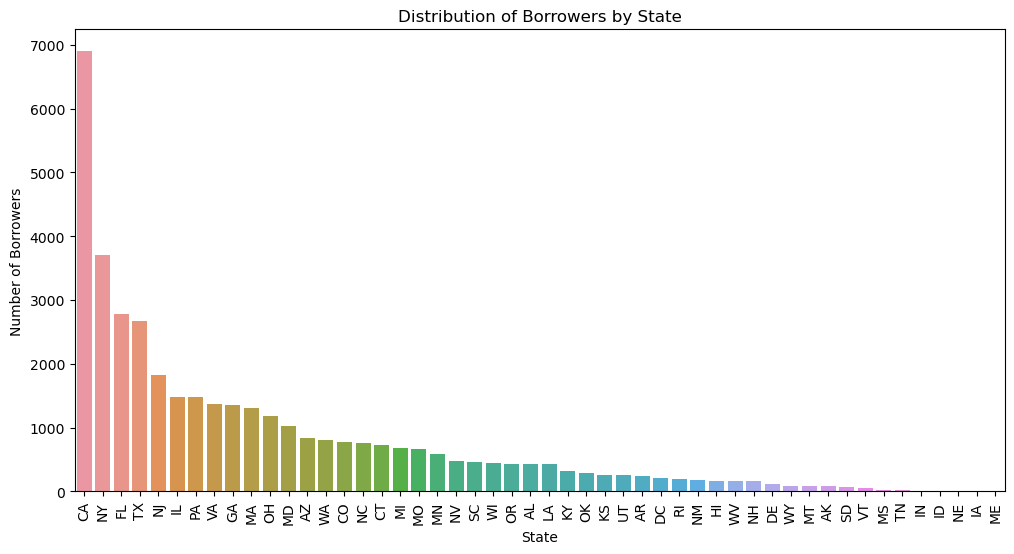

Top 10 states with the highest number of borrowers:
address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
IL    1486
PA    1482
VA    1375
GA    1355
MA    1310
Name: count, dtype: int64
Top 10 states with the lowest number of borrowers:
address_state
AK    78
SD    63
VT    54
MS    19
TN    17
IN     9
ID     6
NE     5
IA     5
ME     3
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of borrowers per state
state_counts = df['address_state'].value_counts()
# Plot the distribution of borrowers by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='address_state', order=df['address_state'].value_counts().index)
plt.title('Distribution of Borrowers by State')
plt.xlabel('State')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=90)
plt.show()

# Display the top states
print("Top 10 states with the highest number of borrowers:")
print(state_counts.head(10))

# Display the last states
print("Top 10 states with the lowest number of borrowers:")
print(state_counts.tail(10))

In [15]:
# Group by state and sum the loan amounts
loan_by_state = df.groupby('address_state')['loan_amount'].sum().reset_index()

# Sort the states by total loan amount
loan_by_state_sorted = loan_by_state.sort_values(by='loan_amount', ascending=False)

# Display the top 10 states by total loan amount
top_10_states = loan_by_state_sorted.head(10)
print("Top 10 states by total loan amount:")
print(top_10_states)

# Display the bottom 10 states by total loan amount
bottom_10_states = loan_by_state_sorted.tail(10)
print("\nBottom 10 states by total loan amount:")
print(bottom_10_states)

Top 10 states by total loan amount:
   address_state  loan_amount
4             CA     78484125
33            NY     42077050
42            TX     31236650
9             FL     30046125
30            NJ     21657475
14            IL     17124225
44            VA     15982650
37            PA     15826525
10            GA     15480325
19            MA     15051000

Bottom 10 states by total loan amount:
   address_state  loan_amount
26            MT       829525
40            SD       606150
45            VT       504100
41            TN       162175
25            MS       139125
15            IN        86225
13            ID        59750
12            IA        56450
28            NE        31700
21            ME         9200


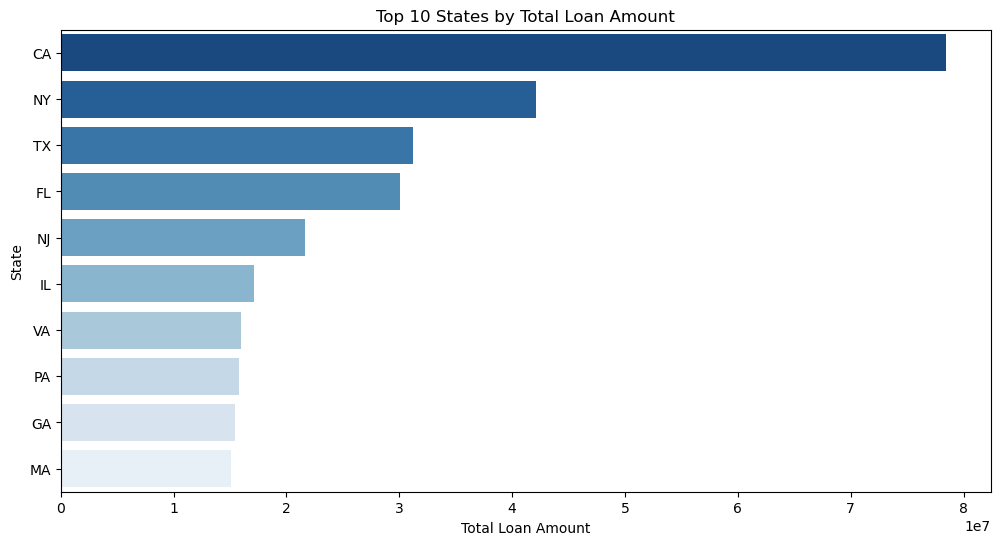

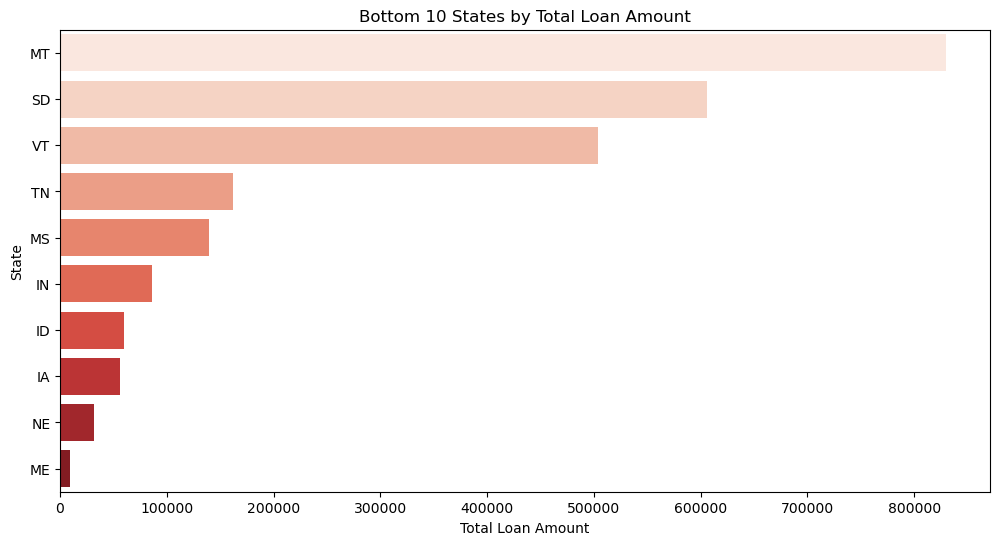

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 states by total loan amount
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_amount', y='address_state', data=top_10_states, palette='Blues_r')
plt.title('Top 10 States by Total Loan Amount')
plt.xlabel('Total Loan Amount')
plt.ylabel('State')
plt.show()

# Plot the bottom 10 states by total loan amount
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_amount', y='address_state', data=bottom_10_states, palette='Reds')
plt.title('Bottom 10 States by Total Loan Amount')
plt.xlabel('Total Loan Amount')
plt.ylabel('State')
plt.show()

## Step 3: Analyze Employment Length
Examine how employment length varies across borrowers to understand job stability.

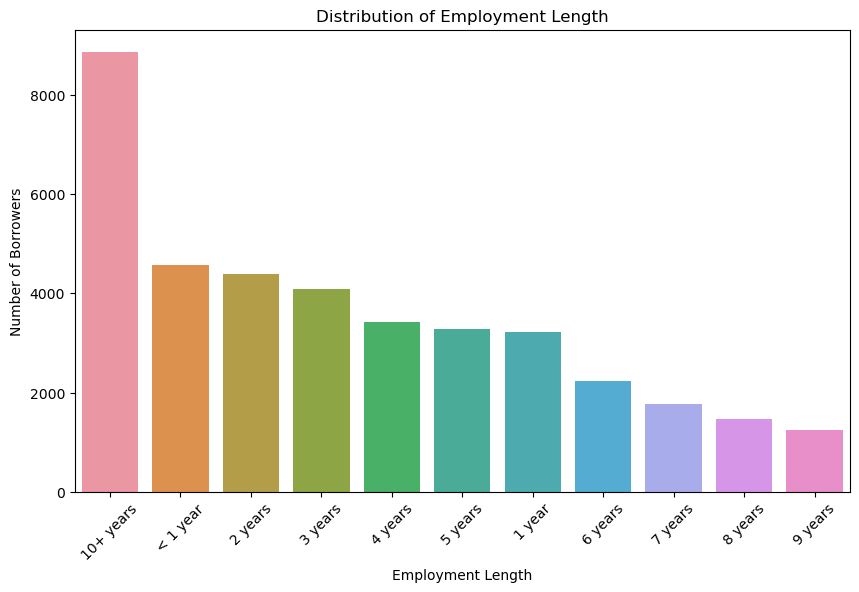

In [3]:
# Plot the distribution of employment length
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emp_length', order=df['emp_length'].value_counts().index)
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

## Step 4: Assess Home Ownership Status
Look at the breakdown of home ownership among borrowers.

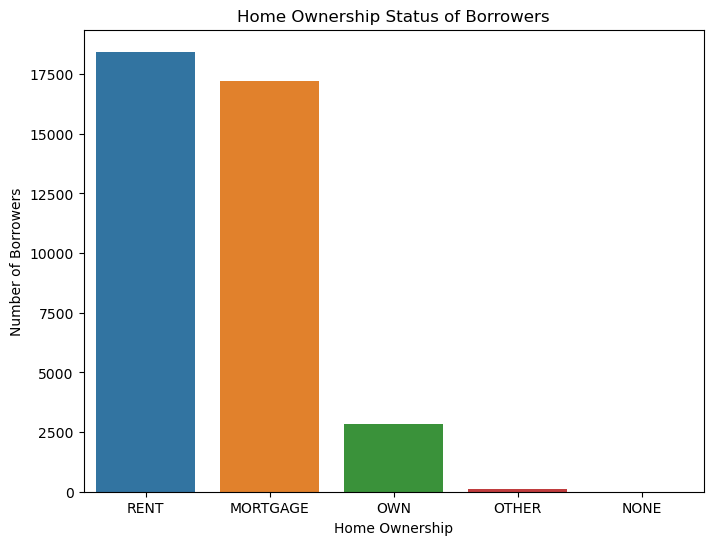

In [4]:
# Plot the distribution of home ownership
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='home_ownership', order=df['home_ownership'].value_counts().index)
plt.title('Home Ownership Status of Borrowers')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Borrowers')
plt.show()

## Step 5: Analyze Income Levels
Explore the distribution of annual income to understand the economic status of borrowers.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


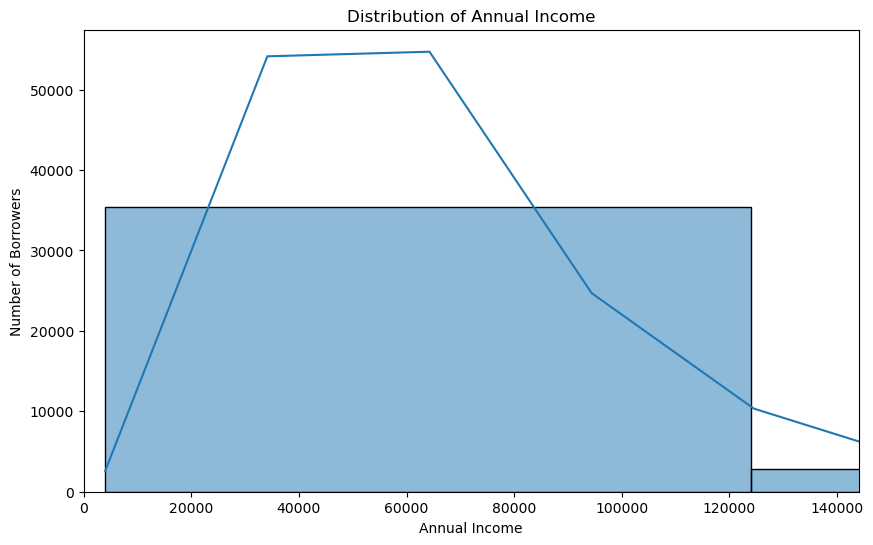

In [5]:
# Plot the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_income'], bins=50, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Borrowers')
plt.xlim(0, df['annual_income'].quantile(0.95))  # Focus on the 95th percentile
plt.show()

## Step 6: Verify Income and Employment
Investigate the proportion of verified vs. non-verified incomes and employment statuses.

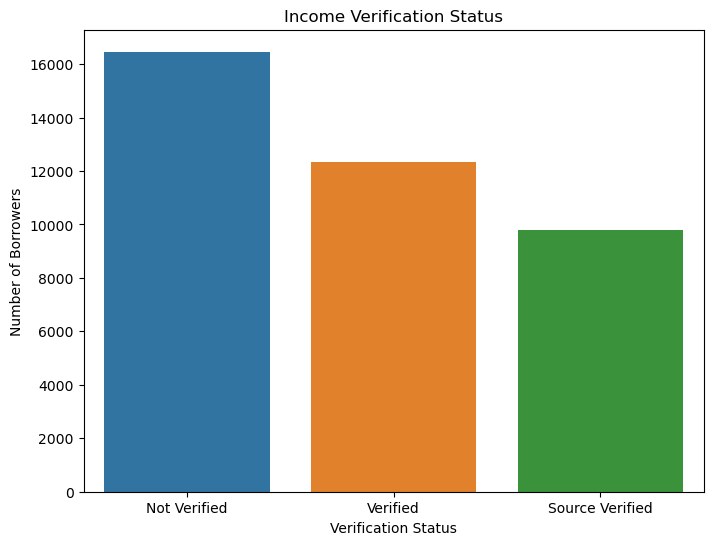

In [6]:
# Plot the distribution of verification status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='verification_status', order=df['verification_status'].value_counts().index)
plt.title('Income Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Borrowers')
plt.show()

## Step 7: Explore Loan Purpose
Identify the main reasons borrowers seek loans, which can inform product development and marketing strategies.

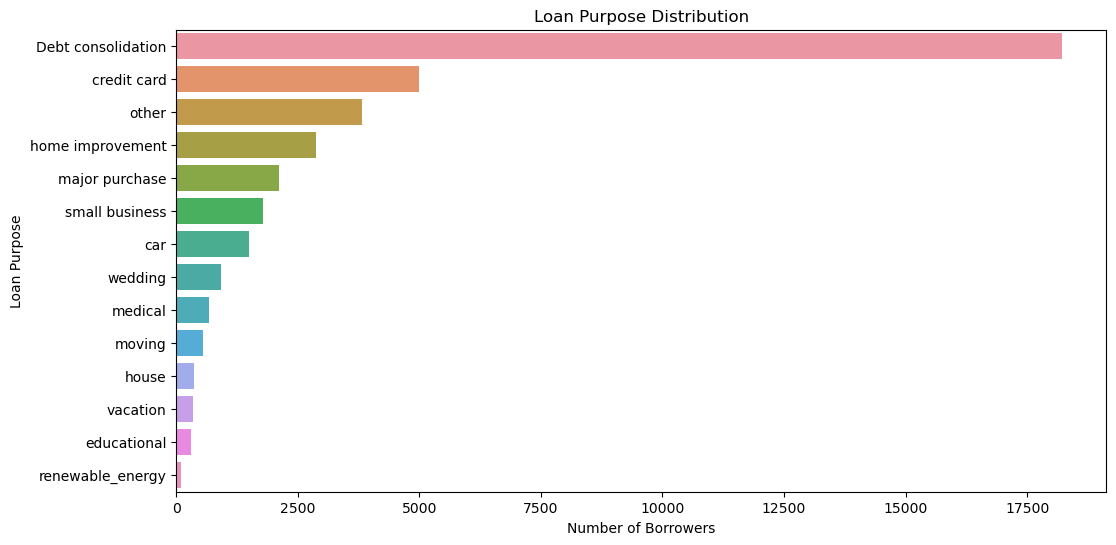

In [7]:
# Plot the distribution of loan purposes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.xlabel('Number of Borrowers')
plt.ylabel('Loan Purpose')
plt.show()

In [2]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [4]:
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

The Aim of this project is to build an automated system, that will help the bank to predict whether a customer will pay it debt in full or not will be charged Off. This EDA will work towards this objective.

In [34]:
# Analyzing the 'loan_status' distribution
print(df['loan_status'].value_counts(normalize=True))  # To see the proportion of each category

loan_status
Fully Paid     0.833290
Charged Off    0.138247
Current        0.027063
Late           0.001400
Name: proportion, dtype: float64


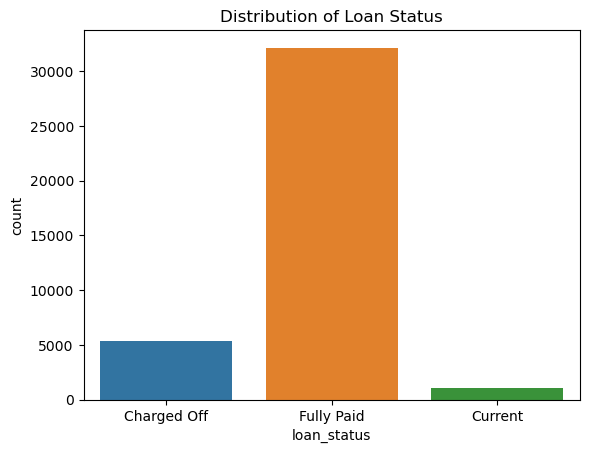

In [6]:
# Visualization of 'loan_status' counts
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

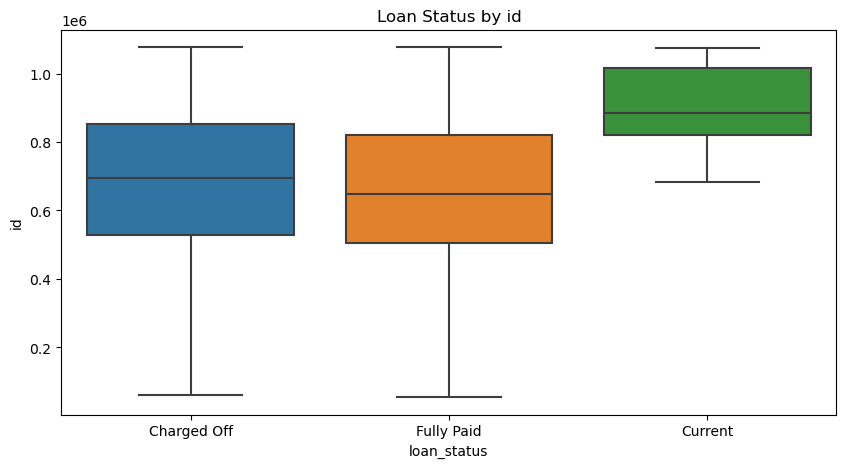

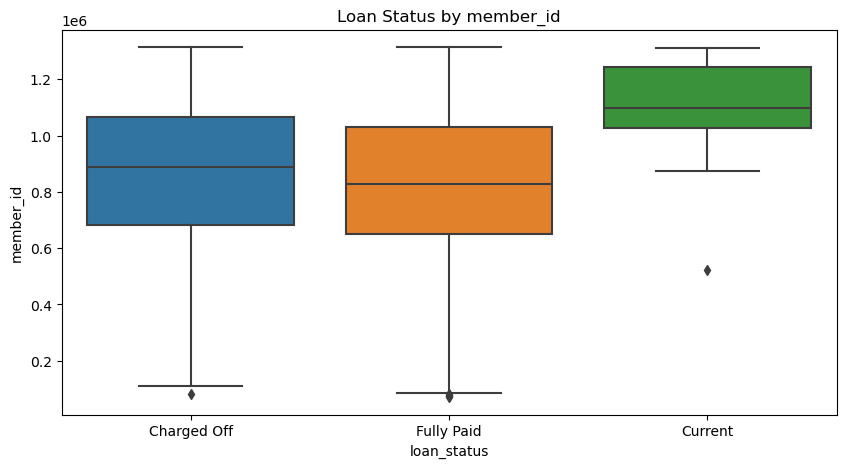

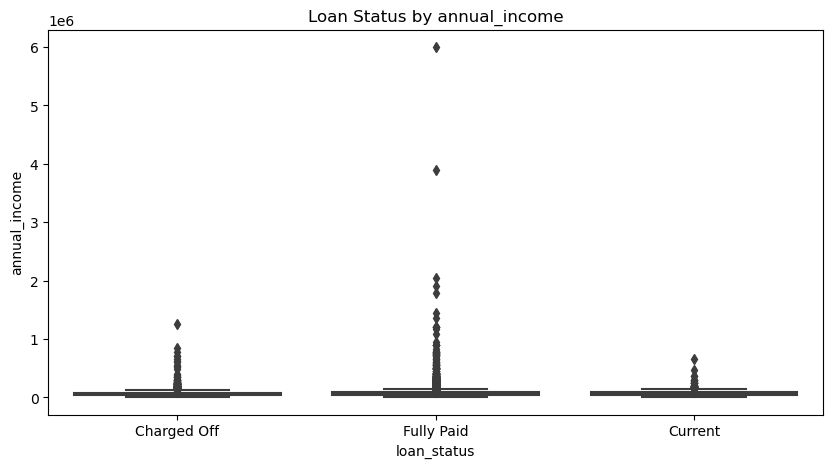

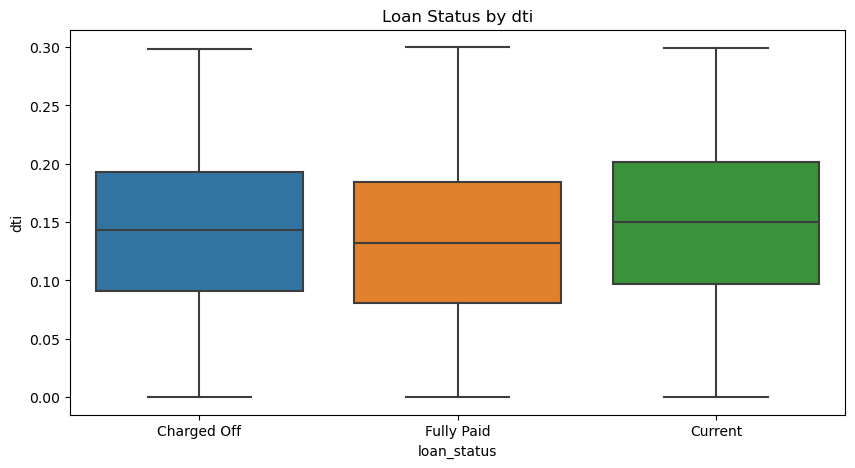

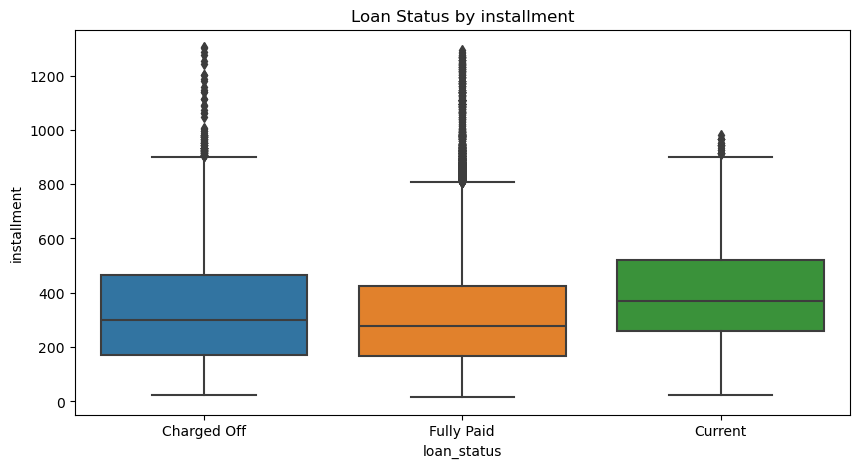

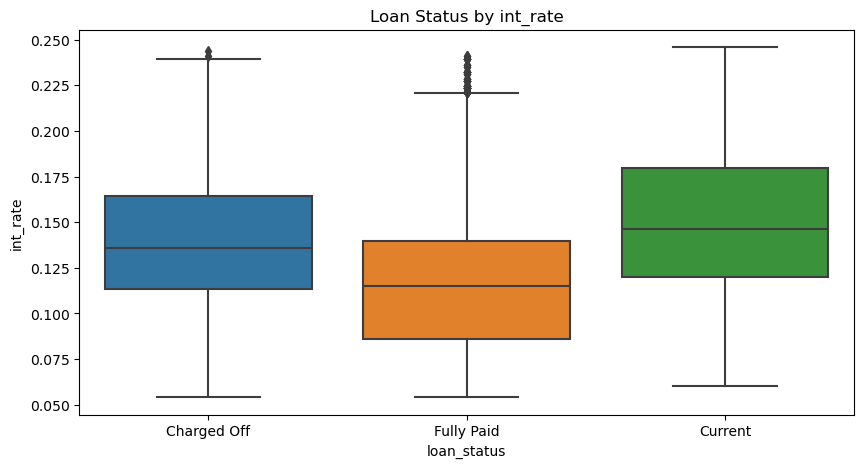

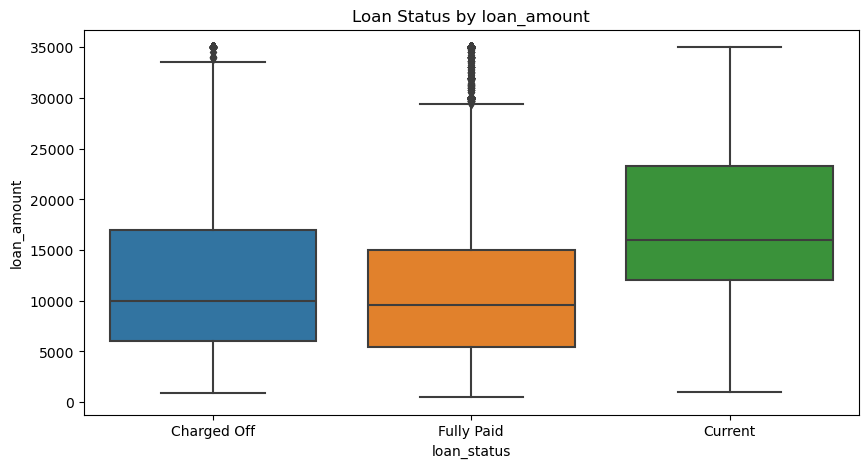

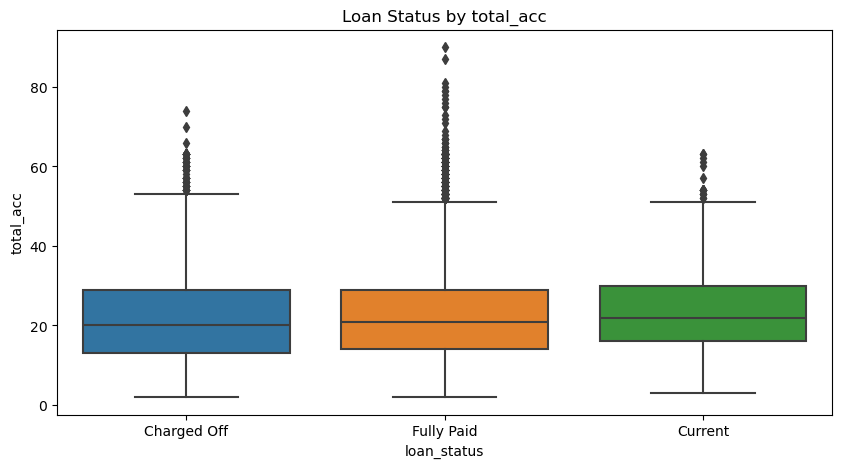

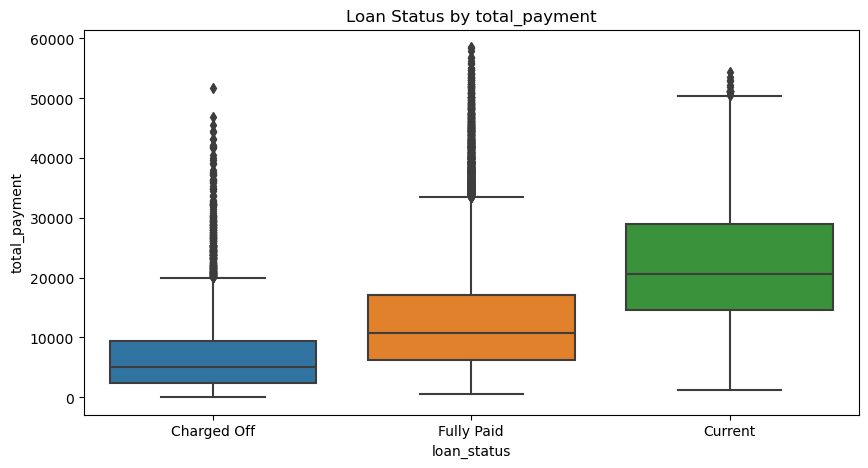

In [11]:
# Exploring relationships between 'loan_status' and numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='loan_status', y=feature, data=df)
    plt.title(f'Loan Status by {feature}')
    plt.show()

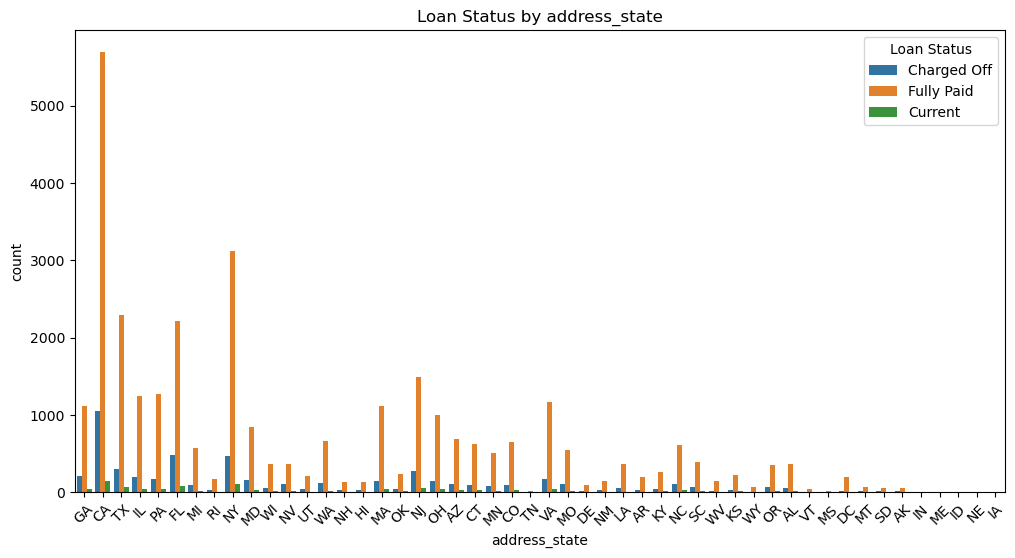

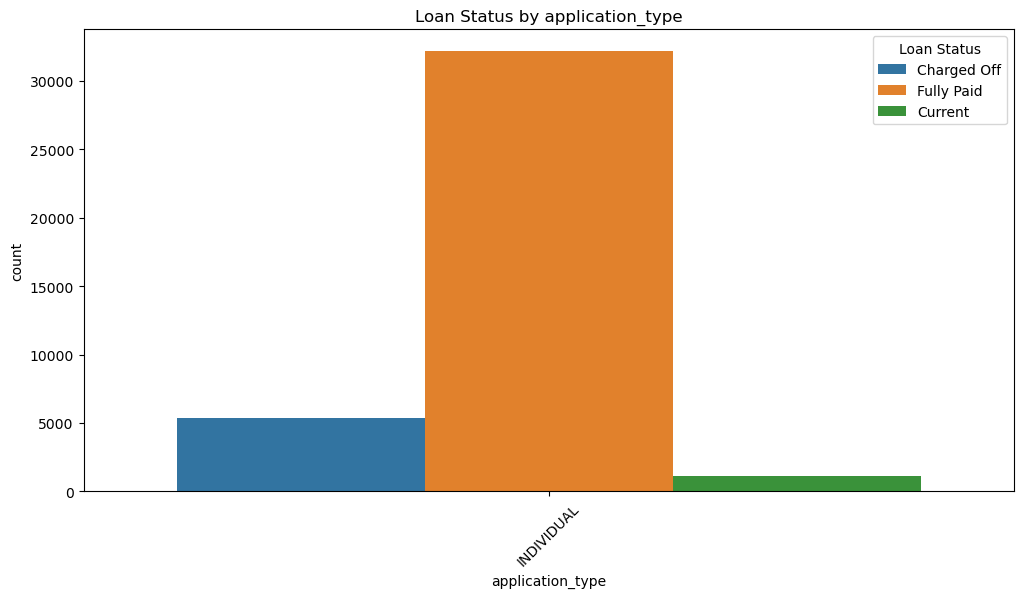

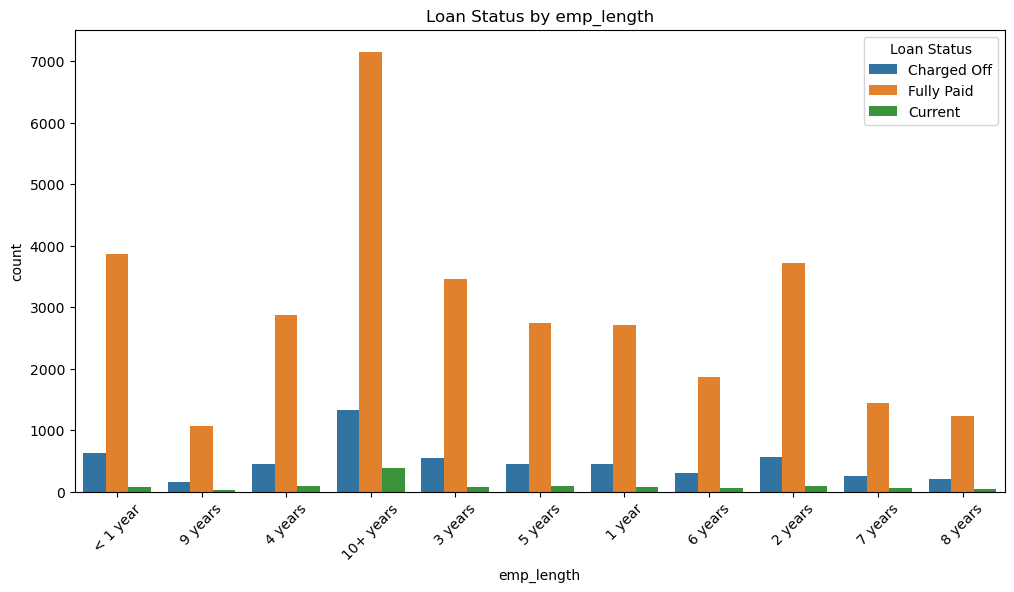

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


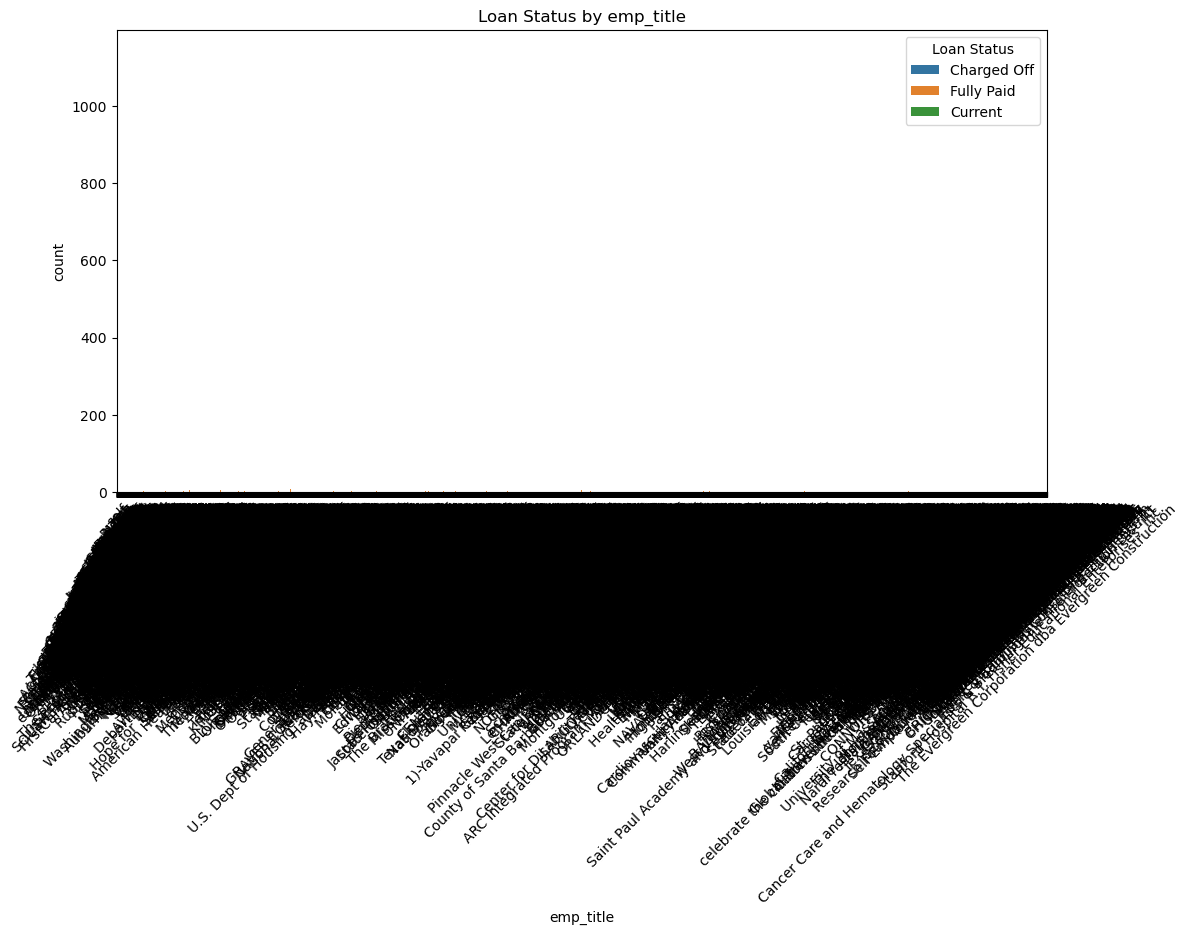

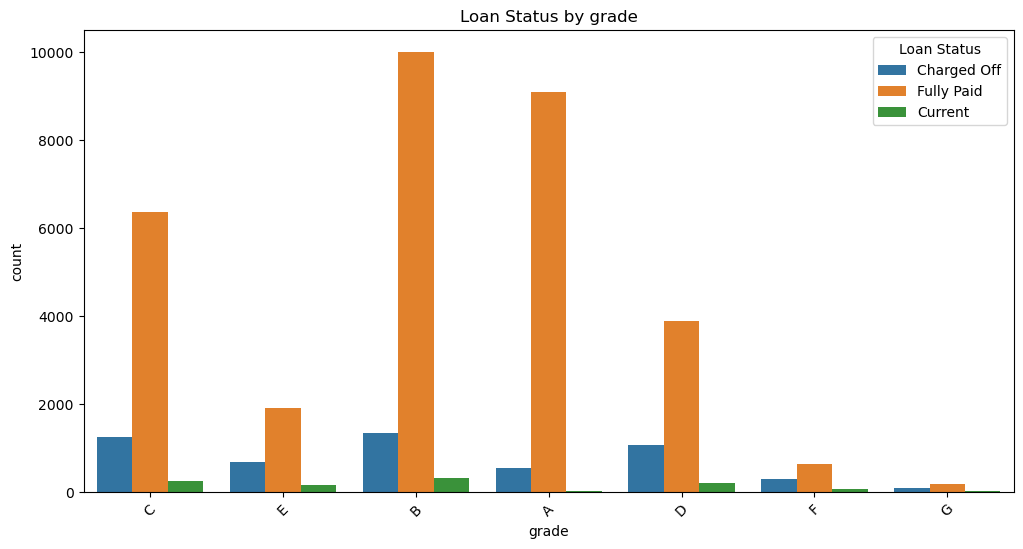

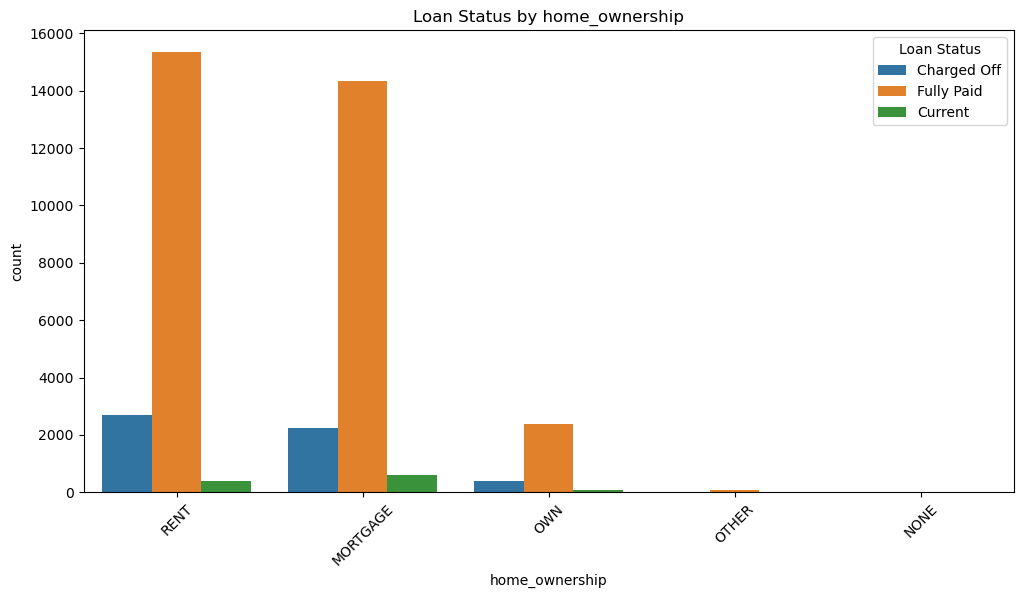

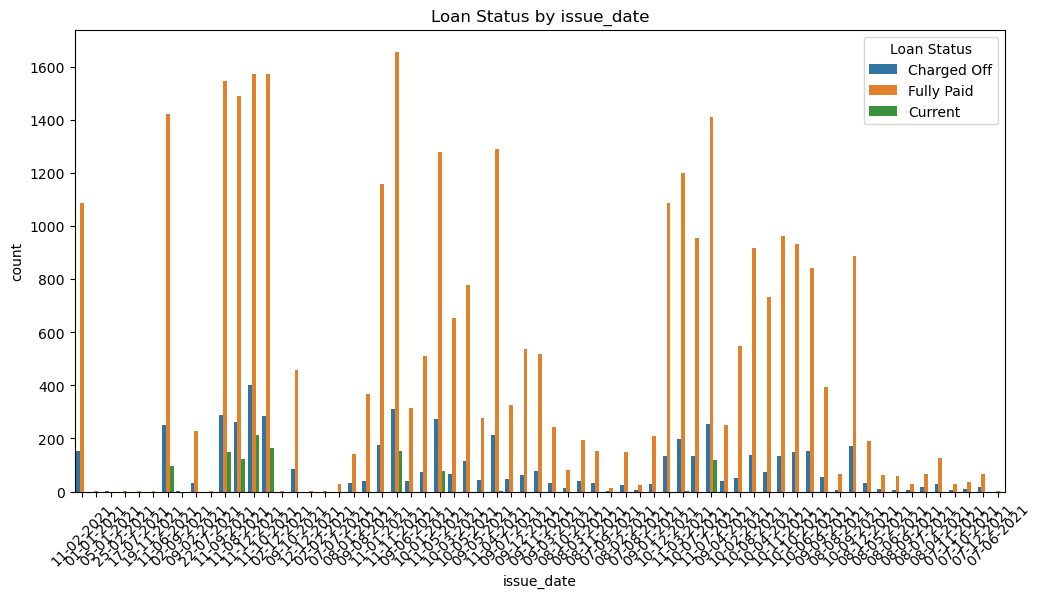

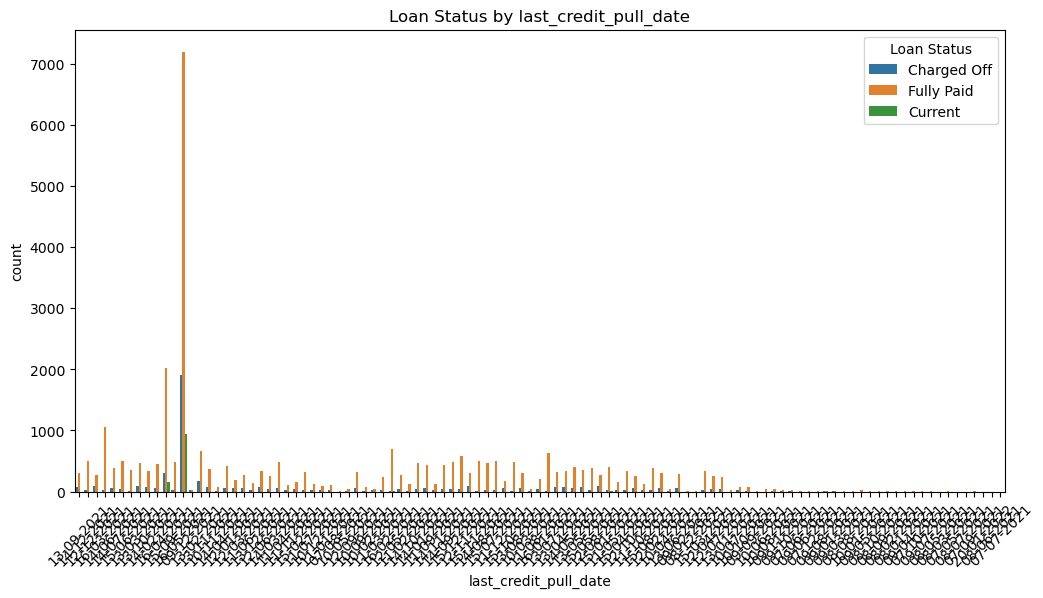

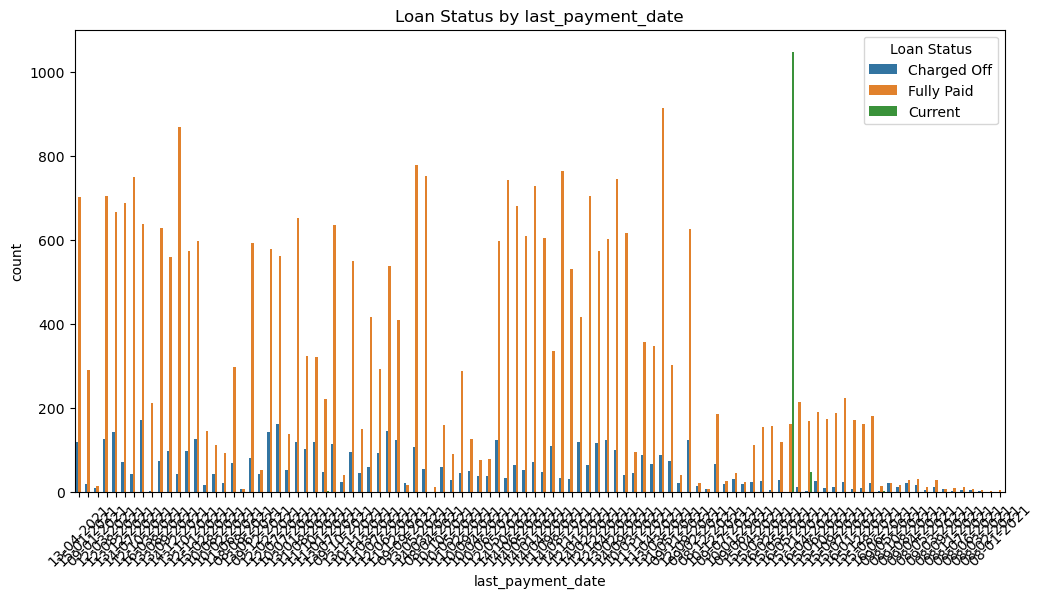

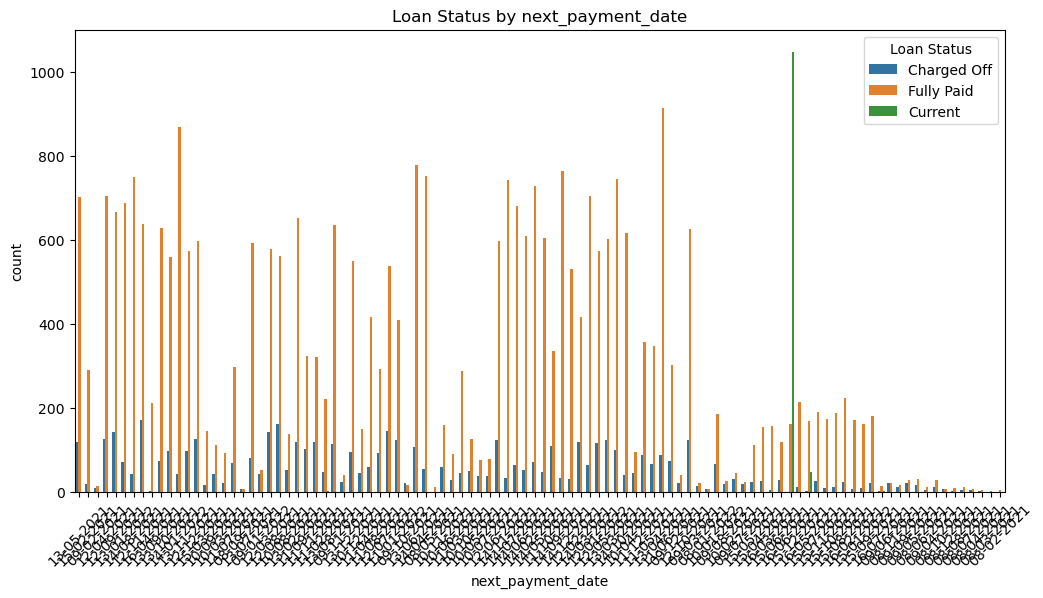

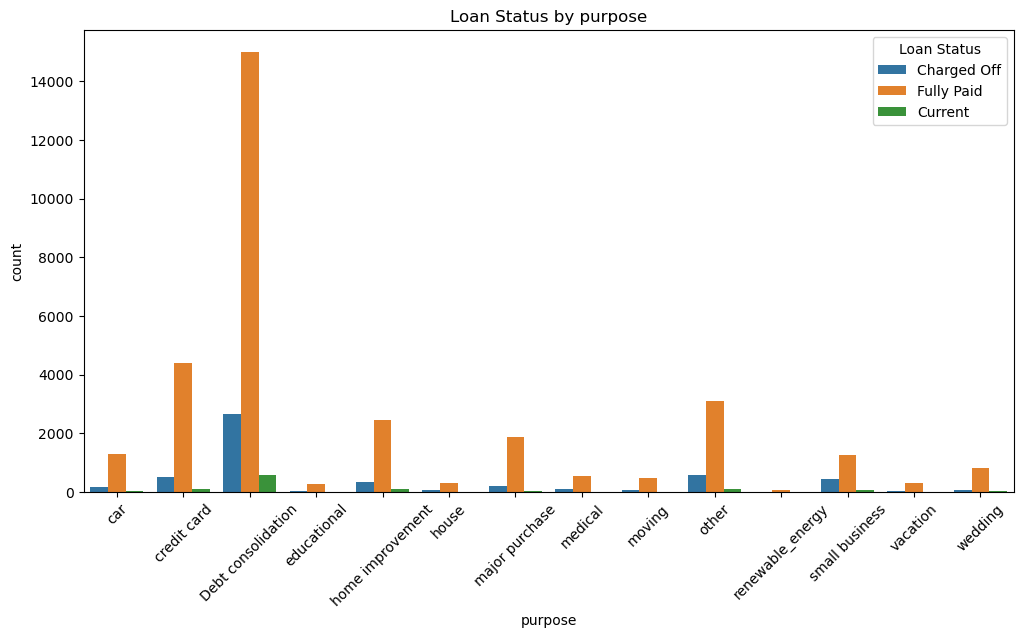

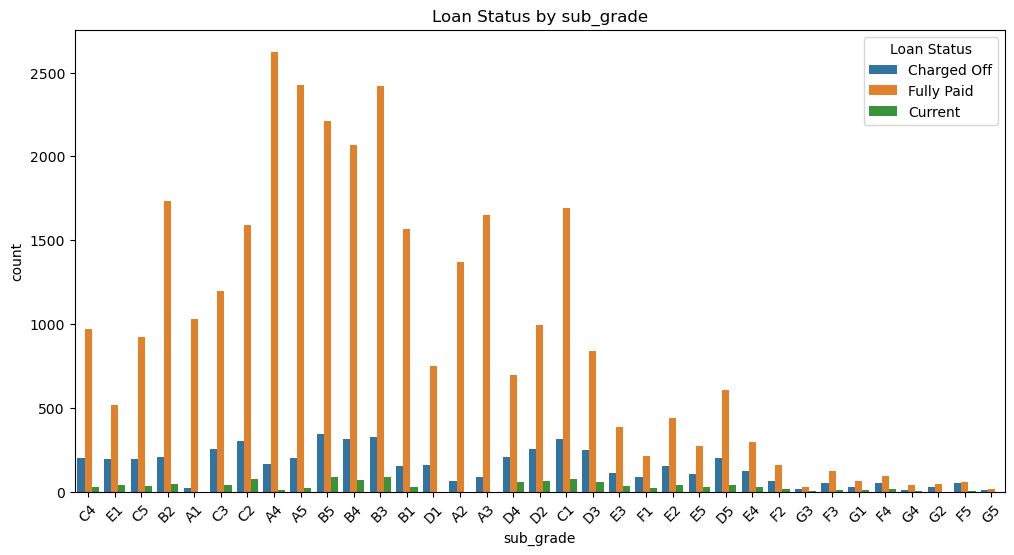

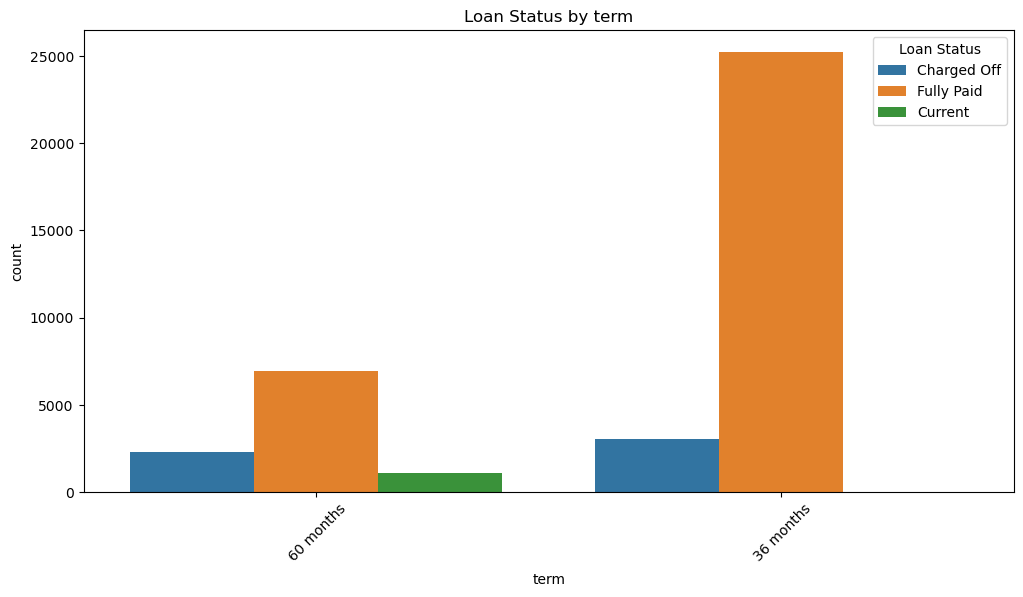

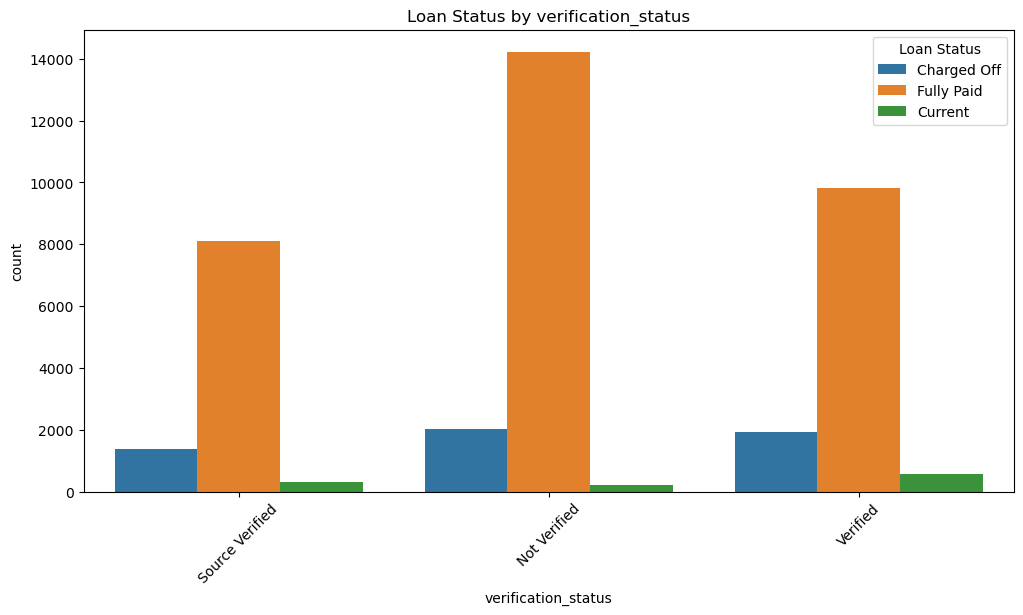

In [13]:
# Exploring relationships between 'loan_status' and categorical features
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'loan_status']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Loan Status by {feature}')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


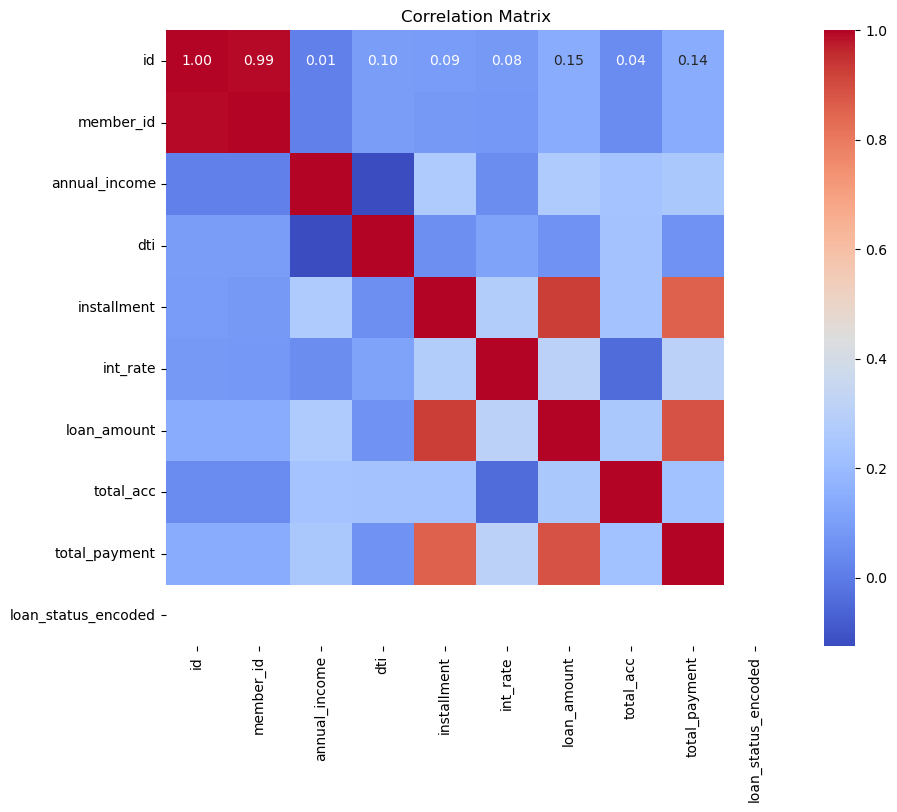

In [12]:
# Correlation matrix of numerical features including 'loan_status' if it's numerical or after encoding
if df['loan_status'].dtype == 'object':
    df['loan_status_encoded'] = df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)  # Example encoding
    numerical_features.append('loan_status_encoded')

corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Further analysis can include more sophisticated statistical tests and modeling to predict 'loan_status'.

### Add Delinquent loan in the data

In [26]:
import pandas as pd
import numpy as np

# Define the potential statuses from which loans can be marked as "Late"
eligible_statuses = ['Current', 'In Grace Period']

# Identify the indices of loans that can be marked as "Late"
eligible_indices = df[df['loan_status'].isin(eligible_statuses)].index

# Determine the number of loans to mark as "Late" (e.g., 5% of eligible loans)
late_sample_size = int(len(eligible_indices) * 0.05)

# Randomly select indices to mark as "Late"
late_indices = np.random.choice(eligible_indices, size=late_sample_size, replace=False)

# Update the selected loans to have a "Late" status
df.loc[late_indices, 'loan_status'] = 'Late'

# Display the number of loans marked as "Late"
print(f"\nNumber of loans marked as 'Late': {late_sample_size}")

# Check unique loan statuses after modification
print("\nUnique loan statuses after modification:")
print(df['loan_status'].unique())

# Preview the modified dataset
print("\nModified data preview with 'Late' status:")
print(df.head())

# Optionally, save the modified dataset to a new CSV file
df.to_csv('../data/processed/financial_loan_with_late_status.csv', index=False)


Number of loans marked as 'Late': 54

Unique loan statuses after modification:
['Charged Off' 'Fully Paid' 'Current' 'Late']

Modified data preview with 'Late' status:
        id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership  issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  2021-02-11            13-09-2021        2021-04-13   
1     E           RENT  2021-01-01            14-12-2021        2021-01-15   
2     C           RENT  2021-01-05            12-12-2021        2021-01-09   
3     B       MORTGAGE  2021-02-25          

## Loan Portfolio health assessment

### Step 2: Loan Status Distribution
Analyze the distribution of loan statuses to understand the overall health of the portfolio.

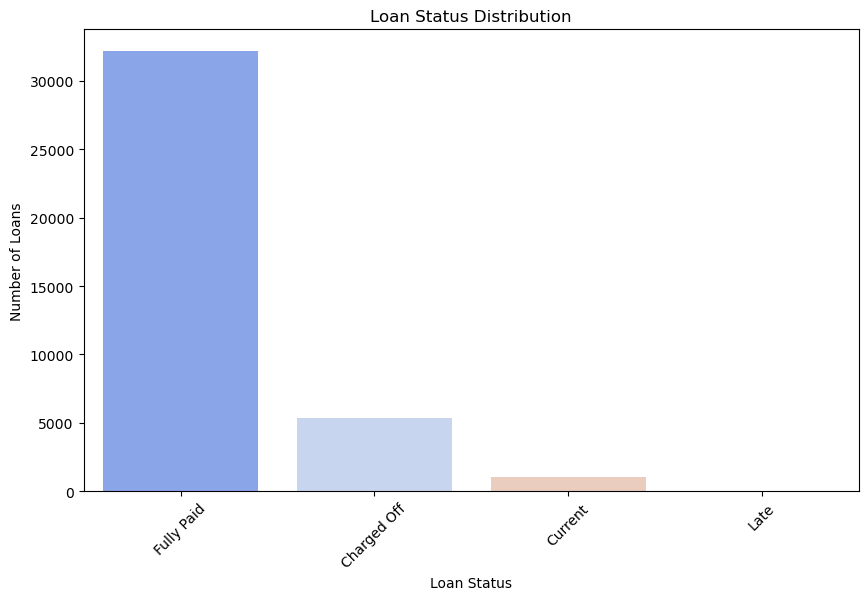

Loan status distribution:
loan_status
Fully Paid     32145
Charged Off     5333
Current         1044
Late              54
Name: count, dtype: int64


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of loans for each status
loan_status_counts = df['loan_status'].value_counts()

# Plot loan status distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='coolwarm')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

# Display loan status distribution
print("Loan status distribution:")
print(loan_status_counts)

## Step 3: Calculate Default and Delinquency Rates
Determine the default rate and delinquency rate to assess credit risk.

In [28]:
# Calculate default rate
default_rate = (df['loan_status'] == 'Charged Off').mean() * 100

# Calculate delinquency rate (assuming 'Late' indicates delinquency)
delinquency_rate = df['loan_status'].str.contains('Late').mean() * 100

print(f"Default Rate: {default_rate:.2f}%")
print(f"Delinquency Rate: {delinquency_rate:.2f}%")

Default Rate: 13.82%
Delinquency Rate: 0.14%


## Step 4: Analyze Average Loan Amount
Evaluate the average loan amount to understand the portfolio’s exposure.

In [29]:
# Calculate average  amount
average_loan_amount = df['loan_amount'].mean()

print(f"Average Loan Amount: ${average_loan_amount:.2f}")

Average Loan Amount: $11296.07


## Step 5: Interest Rate Analysis
Assess the distribution of interest rates to evaluate pricing and risk-adjusted returns.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


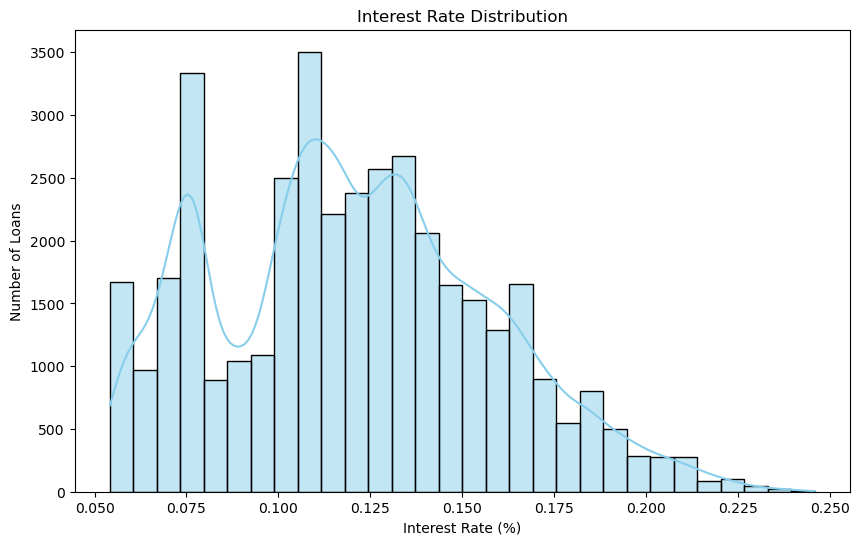

Summary statistics for interest rates:
count    38576.000000
mean         0.120488
std          0.037164
min          0.054200
25%          0.093200
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64


In [30]:
# Plot interest rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'], bins=30, kde=True, color='skyblue')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Loans')
plt.show()

# Display interest rate summary statistics
interest_rate_summary = df['int_rate'].describe()
print("Summary statistics for interest rates:")
print(interest_rate_summary)

## Step 6: Credit Score Distribution
Examine the distribution of credit scores to understand the risk profile.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


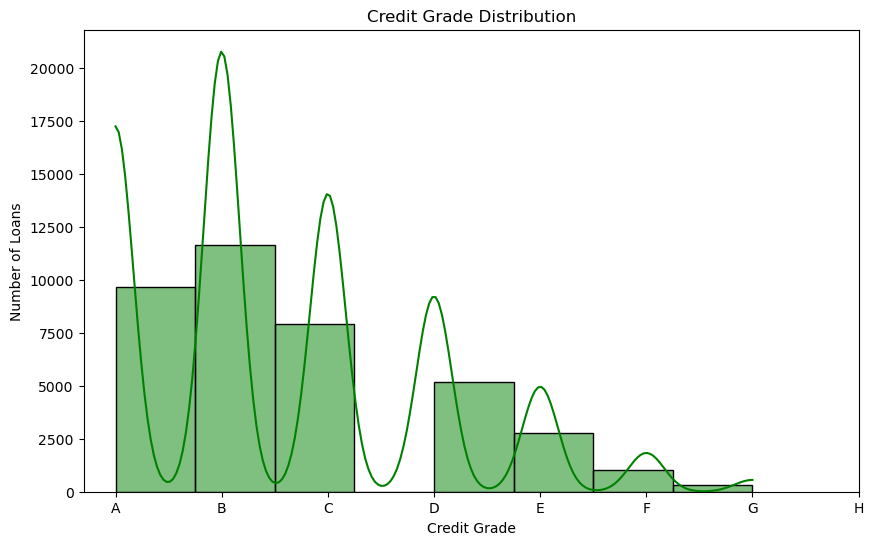

Credit grade distribution:
grade
B    11674
A     9689
C     7904
D     5182
E     2786
F     1028
G      313
Name: count, dtype: int64


In [31]:
# Plot credit score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['grade'].apply(lambda x: ord(x)-65), bins=8, kde=True, color='green') # Assuming grade A=65, B=66...
plt.title('Credit Grade Distribution')
plt.xlabel('Credit Grade')
plt.ylabel('Number of Loans')
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=['A','B','C','D','E','F','G','H'])
plt.show()

# Display credit grade distribution
grade_counts = df['grade'].value_counts()
print("Credit grade distribution:")
print(grade_counts)

## Step 7: Debt-to-Income (DTI) Ratio
Analyze the average DTI ratio to assess borrowers' repayment capacity.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


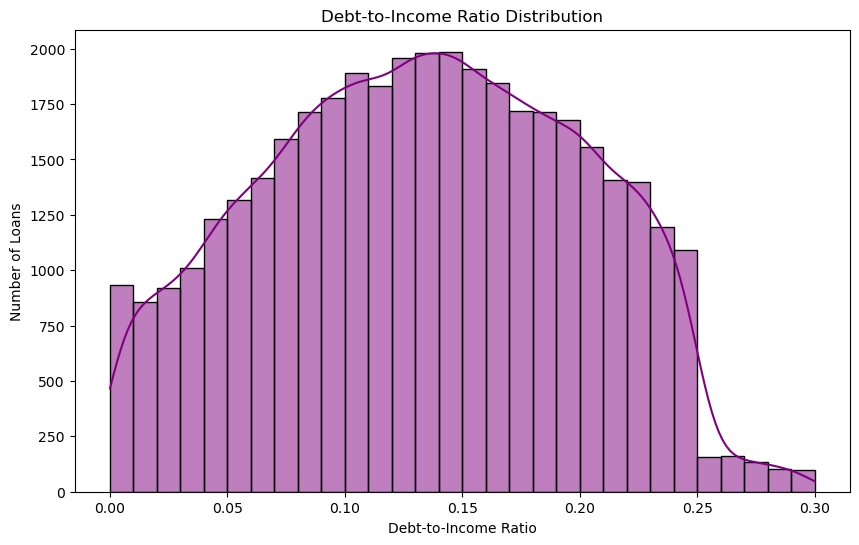

Average Debt-to-Income Ratio: 0.13


In [32]:
# Plot DTI ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['dti'], bins=30, kde=True, color='purple')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Number of Loans')
plt.show()

# Calculate average DTI ratio
average_dti = df['dti'].mean()

print(f"Average Debt-to-Income Ratio: {average_dti:.2f}")

## Step 8: Calculate Recovery Rate
Calculate the recovery rate to understand the percentage of the principal amount recovered from defaulted loans.

In [33]:
# Calculate total payment and total loan amount for defaulted loans
defaulted_loans = df[df['loan_status'] == 'Charged Off']
total_recovered = defaulted_loans['total_payment'].sum()
total_defaulted = defaulted_loans['loan_amount'].sum()

# Calculate recovery rate
recovery_rate = (total_recovered / total_defaulted) * 100 if total_defaulted > 0 else 0

print(f"Recovery Rate: {recovery_rate:.2f}%")

Recovery Rate: 56.90%


## Profitability analysis


Loan product profitability metrics:
                    loan_amount  interest_paid  number_of_loans  \
purpose                                                           
Debt consolidation    232459675       39604336            18214   
credit card            58885175        9728876             4998   
home improvement       33350775        5413699             2876   
other                  31155750        4803155             3824   
small business         24123100        3418171             1776   
major purchase         17251600        2522429             2110   
car                    10223575        1578950             1497   
wedding                 9225800        1526340              928   
medical                 5533225         821948              667   
house                   4824925         721812              366   
moving                  3748125         567595              559   
educational             2161650         276156              315   
vacation                1

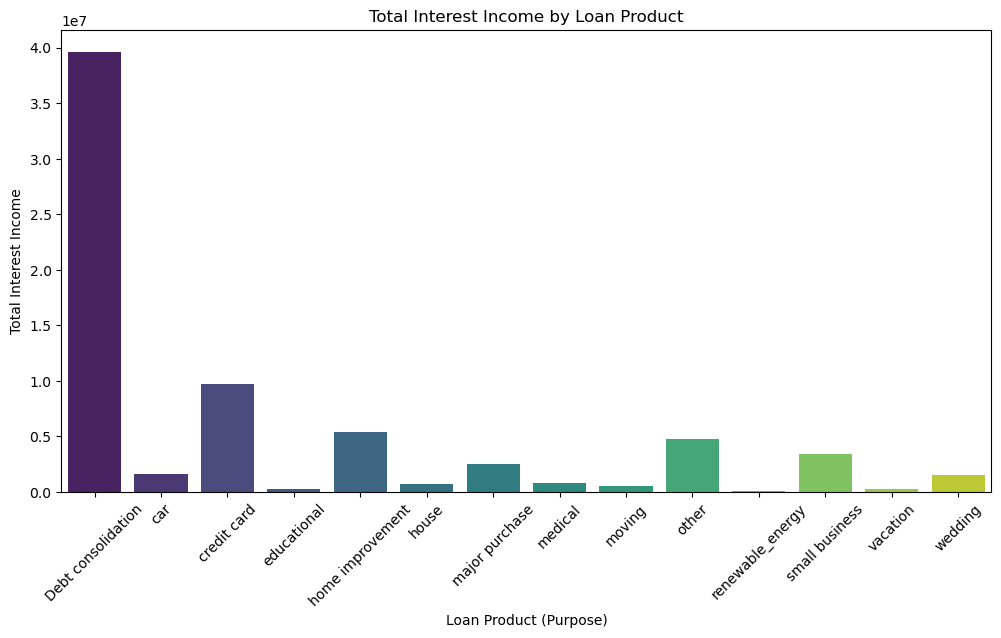

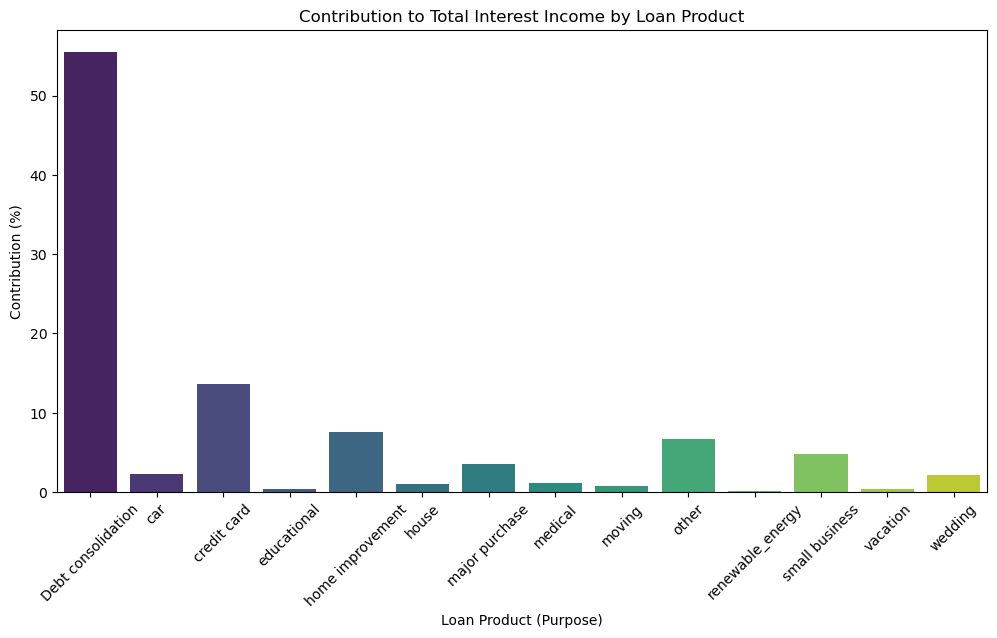

In [35]:
import pandas as pd
import numpy as np

# Ensure relevant columns are numeric
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
df['total_payment'] = pd.to_numeric(df['total_payment'], errors='coerce')

# Calculate interest paid for each loan
# Assuming total payment includes principal + interest
df['interest_paid'] = df['total_payment'] - df['loan_amount']

# Replace any negative values due to data issues
df['interest_paid'] = df['interest_paid'].clip(lower=0)

# Group by loan purpose to calculate total interest paid and count of loans
loan_profitability = df.groupby('purpose').agg({
    'loan_amount': 'sum',
    'interest_paid': 'sum',
    'loan_status': 'count'  # to get the number of loans
}).rename(columns={'loan_status': 'number_of_loans'})

# Calculate average interest rate for each loan product
loan_profitability['average_interest_rate'] = df.groupby('purpose')['int_rate'].mean()

# Calculate percentage contribution to total interest income
total_interest_income = loan_profitability['interest_paid'].sum()
loan_profitability['interest_income_contribution'] = (loan_profitability['interest_paid'] / total_interest_income) * 100

# Display profitability metrics
print("\nLoan product profitability metrics:")
print(loan_profitability.sort_values(by='interest_paid', ascending=False))

# Plot the profitability by loan purpose
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=loan_profitability.reset_index(), x='purpose', y='interest_paid', palette='viridis')
plt.title('Total Interest Income by Loan Product')
plt.xlabel('Loan Product (Purpose)')
plt.ylabel('Total Interest Income')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=loan_profitability.reset_index(), x='purpose', y='interest_income_contribution', palette='viridis')
plt.title('Contribution to Total Interest Income by Loan Product')
plt.xlabel('Loan Product (Purpose)')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.show()